In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Mushrooms.csv")

In [3]:
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
data.tail()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8122,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
x=data.iloc[:,1:].values

y=data.iloc[:,0].values

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])


In [7]:
data.shape

(8123, 23)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
p      8123 non-null int32
x      8123 non-null int32
s      8123 non-null int32
n      8123 non-null int32
t      8123 non-null int32
p.1    8123 non-null int32
f      8123 non-null int32
c      8123 non-null int32
n.1    8123 non-null int32
k      8123 non-null int32
e      8123 non-null int32
e.1    8123 non-null int32
s.1    8123 non-null int32
s.2    8123 non-null int32
w      8123 non-null int32
w.1    8123 non-null int32
p.2    8123 non-null int32
w.2    8123 non-null int32
o      8123 non-null int32
p.3    8123 non-null int32
k.1    8123 non-null int32
s.3    8123 non-null int32
u      8123 non-null int32
dtypes: int32(23)
memory usage: 729.9 KB


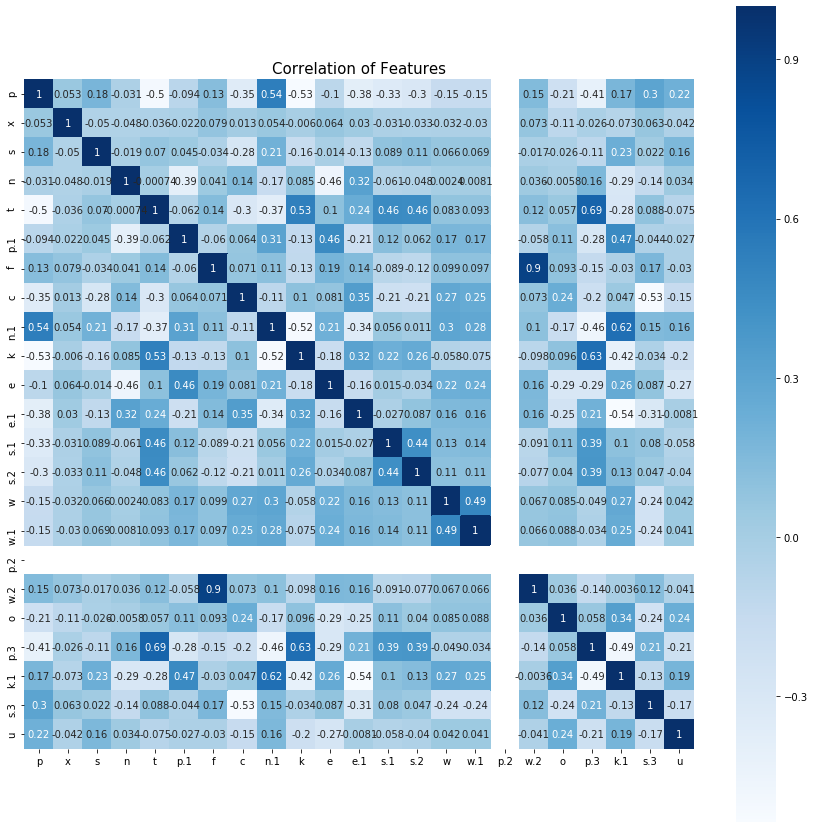

In [9]:
colormap = plt.cm.Blues
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', size=15)

sns.heatmap(data.astype(float).corr(), square=True,annot=True,cmap=colormap)
plt.show()

In [10]:
# Splitting Data into Dependent and Independent Data for classification 
# Splitting the data into dependet and independent variables
x=data.iloc[:,1:].values
# all rows, all the features and no labels 
y=data.iloc[:,0].values
# all rows, label only

In [11]:
# Splitting the data into training (test: 30%, training 70% )
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression()
logistic_regressor.fit(X_train,y_train)

C:\Users\china\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve

In [14]:
#Using Decision Tree Regression
from sklearn.tree import DecisionTreeClassifier
dt_regressor=DecisionTreeClassifier(random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
#Using Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
rf_regressor=RandomForestClassifier(n_estimators=50, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#Activation function for the hidden layer.
# here we are using simple Logistic which returns f(x) = 1 / (1 + exp(-x))
#‘sgd’ refers to stochastic gradient descent
#alphafloat, default=0.0001 ,L2 penalty (regularization term) parameter.
#learning Rate-It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.


In [17]:
#Using Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1) #verbose=True,max_iter=100)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.1, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve


#Creating a function to get accuracy of the model used.

def analyze_model(model, X_test, y_test):
    y_pred=model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    fpr, rc, th = roc_curve(y_test, y_prob[:, 1])
    precision, recall, threshold = precision_recall_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, rc)
    print('Metrics: Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, AUC: {:.3f}'.format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), roc_auc))
    #For roc curve
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(131)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('Recall')
    ax.set_title('ROC Curve')
    ax.plot(fpr, rc, 'b')
    ax.plot([0.0, 1.0], [0.0, 1.0], 'r--')
    ax.text(0.80, 0.05, 'auc: {:.2f}'.format(roc_auc))

Logistic Regression
Metrics: Accuracy: 0.952, Precision: 0.963, Recall: 0.936, AUC: 0.980


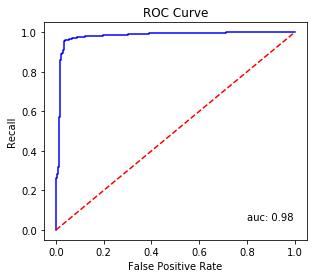

In [19]:
print('Logistic Regression')
analyze_model(logistic_regressor, X_test, y_test)

Random Forest Classifier
Metrics: Accuracy: 1.000, Precision: 1.000, Recall: 1.000, AUC: 1.000


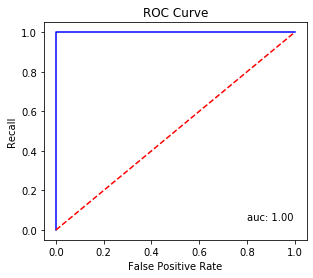

In [20]:
print("Random Forest Classifier")
analyze_model(rf_regressor, X_test, y_test)

Multi-Layer Perceptron
Metrics: Accuracy: 0.949, Precision: 0.987, Recall: 0.905, AUC: 0.912


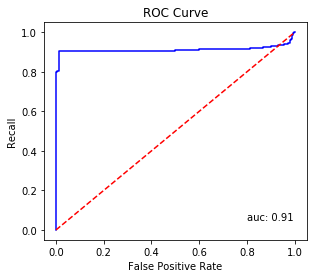

In [21]:
print("Multi-Layer Perceptron")
analyze_model(mlp, X_test, y_test)

Decision Tree Classifier
Metrics: Accuracy: 1.000, Precision: 1.000, Recall: 1.000, AUC: 1.000


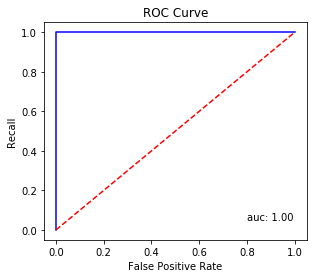

In [22]:
print("Decision Tree Classifier")
analyze_model(dt_regressor, X_test, y_test)